# Benötigte imports

In [1]:
import keras as keras
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D
from keras.models import clone_model
import matplotlib.ticker as ticker

from plotDigits import predictAndPlot, plotDigit

import matplotlib.pyplot as plt

2024-06-02 19:44:04.391732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Erstellung des Modells

In [2]:
# initialisierung des Modells
untrained_model = Sequential()
untrained_model.add(Dense(600, activation='relu', input_shape=(784, ),name = "first_layer"))
untrained_model.add(Dense(400, activation='relu',  name = "hidden_layer_1"))
untrained_model.add(Dense(100, activation='relu',  name = "hidden_layer_2"))
untrained_model.add(Dense(10, activation = 'softmax', name = "output_layer"))

/Users/moritzschroer/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Erstelltes Modell kompilieren

In [3]:
# kompilieren des Modells
model = clone_model(untrained_model)
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Einlesen der Trainingsdaten

In [4]:
import random
from keras.datasets import mnist
import sys

# Diese Methode ließt eine Anzahl von train_size Handgeschriebenen Ziffern zum Training und eine Anzahl von
# test_size Hangeschriebenen Ziffern zum Testen aus dem  mnist dataset in arrays und gibt die arrays zurück

def readData(train_size, test_size):
    # Lade den MNIST-Datensatz
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Überprüfe, ob train_size oder test_size nicht größer als die Anzahl der Datensätze ist
    if train_size > len(x_train) :
        print("Fehler: train_size überschreitet Datenmenge von "+str(len(x_train)))
        sys.exit() 
    if test_size > len(x_test) :
        print("Fehler: test_size überschreitet Datenmenge von "+str(len(x_test)))
        sys.exit() 

    # Wähle zufällige Indizes für Trainingsdaten
    train_indices = random.sample(range(len(x_train)), train_size)
    # Wähle zufällige Indizes für Testdaten
    test_indices = random.sample(range(len(x_test)), test_size)
    
    # Extrahiere die ausgewählten Trainingsdaten und Testdaten
    train_data = x_train[train_indices].reshape(train_size, -1) / 255.0
    verify_train_data = y_train[train_indices]
    test_data = x_test[test_indices].reshape(test_size, -1) / 255.0
    verify_test_data = y_test[test_indices]

    return train_data, verify_train_data, test_data, verify_test_data

In [22]:
# Einlesen der Trainingsdaten und Testdaten
train_length = 200
test_length = 10000
train_data, train_verification_data, test_data, test_verification_data = readData(train_length, test_length)

# Training des Modells

In [23]:
# Trainieren des Modells
model.fit(train_data, train_verification_data, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.6156 - loss: 1.1335 - val_accuracy: 0.6250 - val_loss: 1.0612
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6740 - loss: 1.0429 - val_accuracy: 0.6500 - val_loss: 1.0464
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7000 - loss: 0.9287 - val_accuracy: 0.7250 - val_loss: 1.0079
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7786 - loss: 0.8550 - val_accuracy: 0.6750 - val_loss: 0.9937
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8193 - loss: 0.7652 - val_accuracy: 0.6500 - val_loss: 0.9823
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8318 - loss: 0.6895 - val_accuracy: 0.7000 - val_loss: 0.9898
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8464 - loss: 0.5920 - val_accuracy: 0.7000 - val_loss: 1.0283
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8359 - loss: 0.5721 - val_accuracy: 0.7000 - val_loss: 1.0309

# Testen und plotten

In [24]:
# Testen des Modells
test_loss, test_acc = model.evaluate(test_data, test_verification_data)
print('Test accuracy:', test_acc, "\nTest loss: ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7064 - loss: 1.0320
Test accuracy: 0.7049000263214111 
Test loss:  1.0323034524917603


In [25]:
# Konvertiert das 1D-Array in ein 2D-Array, das zum Plotten der Ziffer verwendet wird.
def to2DArray(vektor):
    matrix = np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            matrix[i, j] = vektor[i*28 + j]
            
    return matrix
    
# Plottet die Ziffer.
def plotDigit(bilddaten, verifizierungsdaten, geratene_ziffer, confidence):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    for i in range(3):
        for j in range(3):
            axs[i, j].imshow(to2DArray(bilddaten[i*3 + j]), cmap='gray', interpolation='none')
            axs[i, j].set_title("prediction: "+str(geratene_ziffer[3*i + j])+ ", confidence: " +str(round(confidence[3*i+j],3)))
    plt.tight_layout()
    plt.show()

# Vorhersage von 9 zufällig ausgewählten Zahlen aus dem Testdatensatz mit dem Modell 
# und Plotten der Ziffern.
def predictAndPlot(modell, testdaten, test_verifikationsdaten):
    ziffern_verfügbar = range(len(testdaten))
    ziffern_zum_plotten = np.random.choice(ziffern_verfügbar, size = 9, replace=False)
    
    bilddaten, verifizierungsdaten, geratene_ziffer, confidence = [], [], [], []
        
    for j in range(9):
        vorhersage = modell.predict(np.array([testdaten[ziffern_zum_plotten[j]]]))
        bilddaten.append(testdaten[ziffern_zum_plotten[j]])
        verifizierungsdaten.append(test_verifikationsdaten[ziffern_zum_plotten[j]])
        geratene_ziffer.append(np.argmax(vorhersage))
        confidence.append(np.max(vorhersage))
        
        
    plotDigit(bilddaten, verifizierungsdaten, geratene_ziffer, confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


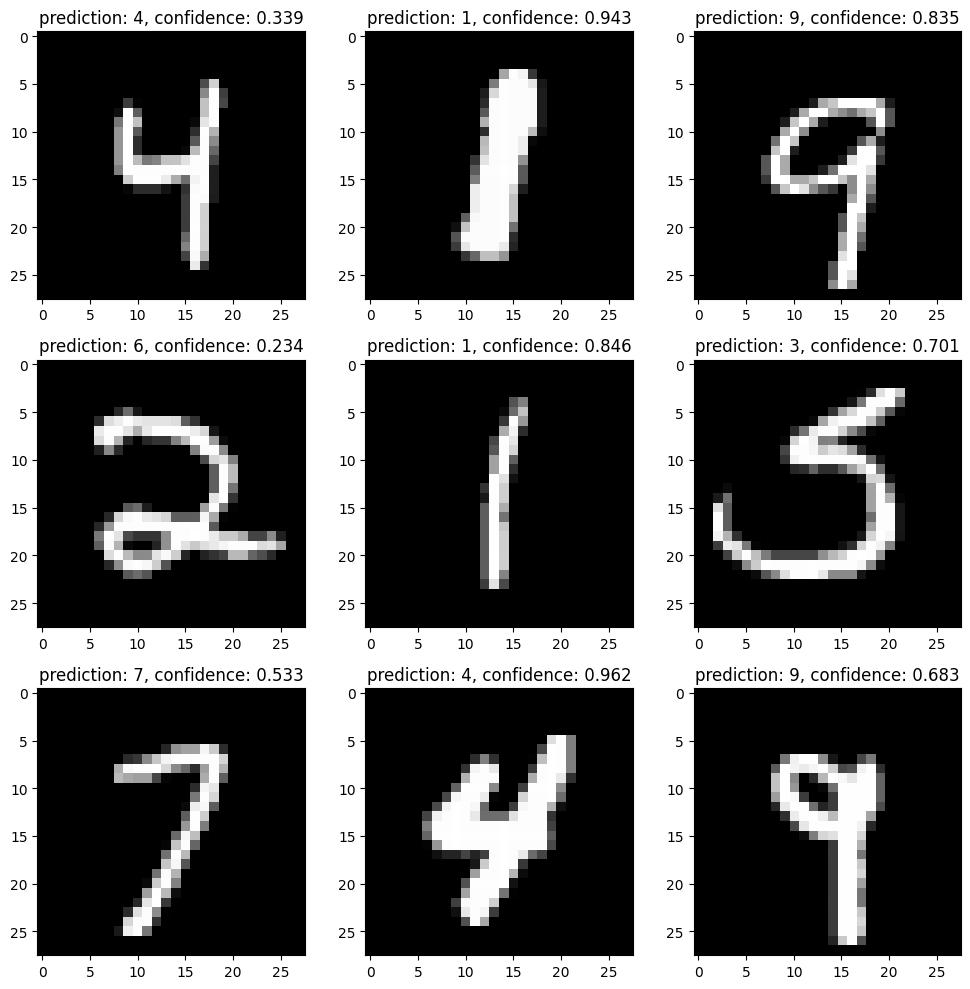

In [26]:
# Plotten einiger vom Modell vorhergesagten Ziffern 
predictAndPlot(model, test_data, test_verification_data)

In [29]:
def predictAndPlotAndShowOutput(modell, testdaten, test_verifikationsdaten):
    ziffern_verfügbar = range(len(testdaten))
    ziffern_zum_plotten = np.random.choice(ziffern_verfügbar, size = 6, replace=False)
    
    fig, ax = plt.subplots(3, 4, figsize=(12, 9))
    for j in range(3):
        for i in range(2):
            vorhersage = modell.predict(np.array([testdaten[ziffern_zum_plotten[j*2+i]]]))
            geratene_ziffer = np.argmax(vorhersage)
            confidence = np.max(vorhersage)
            ax[j, 2*i].imshow(to2DArray(testdaten[ziffern_zum_plotten[j*2+i]]), cmap='gray', interpolation='none')
            ax[j, 2*i].set_title("Prediction: "+str(geratene_ziffer))#+ ", confidence: " +str(round(confidence,3)))
            ax[j, 2*i].axes.get_xaxis().set_visible(False)
            ax[j, 2*i].axes.get_yaxis().set_visible(False)
            ax[j, 2*i+1].bar(np.arange(10), vorhersage[0], color = 'navy')
            ax[j, 2*i+1].set_xlabel("Digit")
            ax[j, 2*i+1].set_ylabel("Probability")
            ax[j, 2*i+1].set_ylim(0,1)
            ax[j, 2*i+1].set_title("Output")
    plt.savefig("output.png", dpi=500)
    
    plt.subplots_adjust(hspace=0.4, wspace = 0.3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


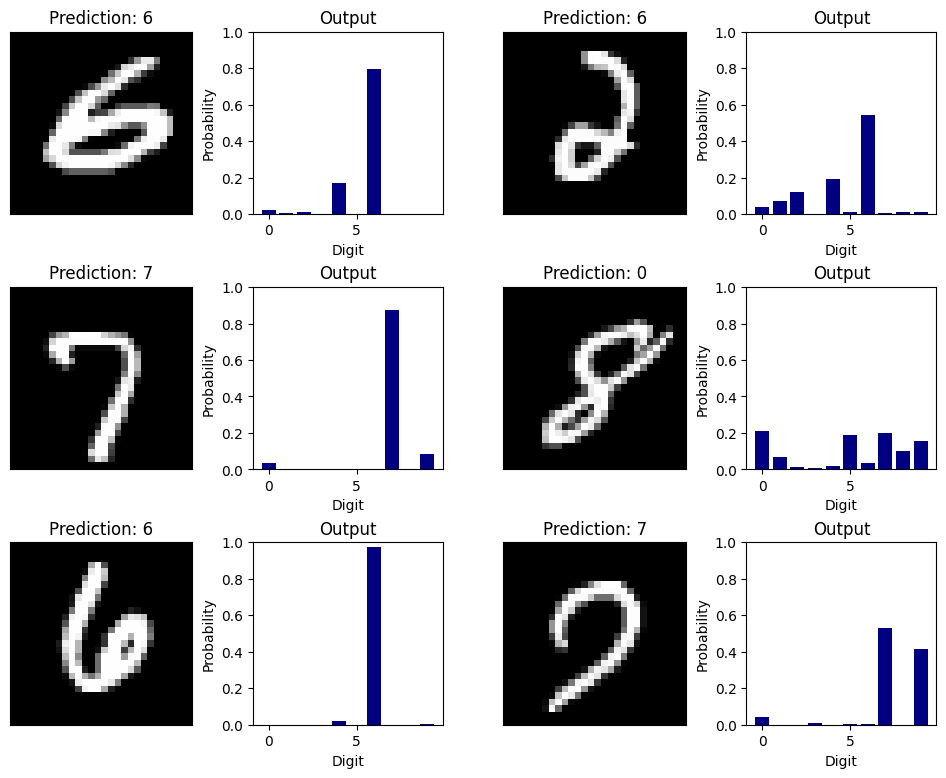

In [37]:
predictAndPlotAndShowOutput(model, test_data, test_verification_data)

In [12]:
from keras_visualizer import visualizer


visualizer(model, file_format='png')

In [13]:
# importiere callback Klasse um benutzerdefinierte Aktionen während des Trainings des Modells durchführen zu können
from keras.callbacks import Callback

# erstelle Klasse mit benutzerdefinierten Aktionen, die während des trainings ausgeführt werden sollen
class TrainMetricsCallback(Callback):
    def __init__(self, x_test=None, y_test=None):
        super(TrainMetricsCallback, self).__init__()
        # listen zum speichern der accuracy und losses auf dem Test und dem Trainingsdatenset nach jeder epoch
        self.train_losses = []
        self.train_accuracies = []
        self.test_losses = []
        self.test_accuracies = []
        self.x_test = x_test
        self.y_test = y_test

    # Am ende der epoch füge die accuracy und loss werte zu den Listen hinzu
    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        
        if self.x_test is not None and self.y_test is not None:
            # Auswerten der modells für das Trainigsdatenset
            loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
            self.test_losses.append(loss)
            self.test_accuracies.append(accuracy)


In [14]:
# Methode um nach jdem Trainingsschritt die accuracy und loss sowohl auf dem Testdatenset als auch
# auf den Trainingsdatenset als Liste zurückzugeben
def train_and_get_metrics(model, x_train, y_train, x_test=None, y_test=None, epochs=1, batch_size = 128):
    train_metrics_callback = TrainMetricsCallback(x_test, y_test)
    model.fit(x_train, y_train, epochs=epochs, callbacks=[train_metrics_callback],  batch_size=batch_size)
    
    # geben die accuracies und losses für die Test und Trainingsdaten zurück
    return train_metrics_callback.train_losses, train_metrics_callback.train_accuracies, \
           train_metrics_callback.test_losses, train_metrics_callback.test_accuracies

In [20]:
# Einlesen von weniger Trainingsdaten und Testdaten zum visualisieren des lernprozesses
train_length = 2500
test_length = 10000
train_data, training_verification_data, test_data, test_verification_data = readData(train_length, test_length)

In [21]:
model = clone_model(untrained_model)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# trainiere das modell und erhalte listen mit den accuracy erten und loss werten für das test und trainingsdatenset nach jeder epoch
no_epochs = 20
train_losses, train_accuracies, test_losses, test_accuracies = train_and_get_metrics(model, train_data, training_verification_data, test_data, test_verification_data,  epochs=no_epochs,  batch_size=128)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 917ms/step - accuracy: 0.0848 - loss: 2.3063
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step - accuracy: 0.1481 - loss: 2.1796
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.1665 - loss: 2.0660
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - accuracy: 0.1719 - loss: 1.9695
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.1669 - loss: 1.9015
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 0.1722 - loss: 1.8192
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - accuracy: 0.2355 - loss: 1.6988
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - accuracy: 0.3388 - loss: 1.5881
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.4499 - loss: 1.4666
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - accuracy: 0.5187 - loss: 1.3734
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step - accuracy: 0.5530 - loss: 1.2692
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.5927 - lo

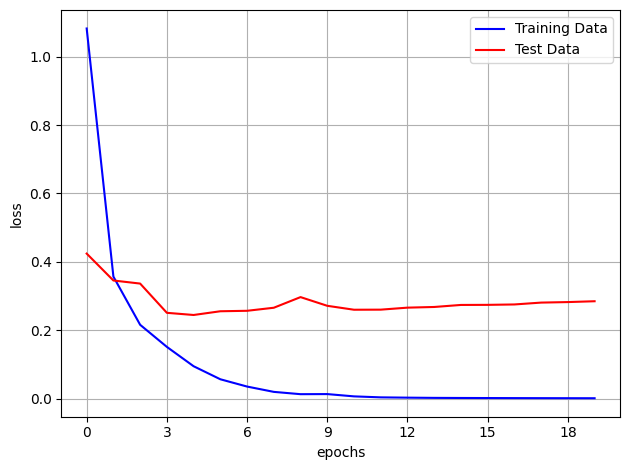

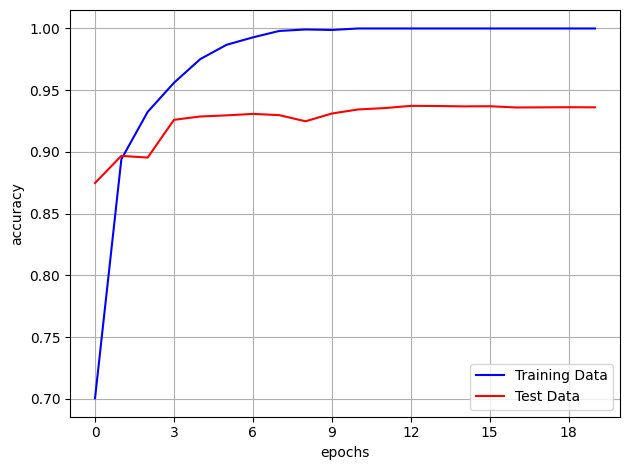

In [17]:
# plotten
epochs = np.arange(no_epochs)
plt.plot(epochs, train_losses, label = 'Training Data', color ='blue')
plt.plot(epochs, test_losses, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(epochs, train_accuracies, label = 'Training Data', color ='blue')
plt.plot(epochs, test_accuracies, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
# initialisierung des Modells
untrained_model = Sequential()
untrained_model.add(Dense(600, activation='relu', input_shape=(784, ),name = "first_layer"))
untrained_model.add(Dense(10, activation='relu',  name = "hidden_layer_1"))
untrained_model.add(Dense(10, activation = 'softmax', name = "output_layer"))

/Users/moritzschroer/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model = clone_model(untrained_model)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# trainiere das modell und erhalte listen mit den accuracy erten und loss werten für das test und trainingsdatenset nach jeder epoch
no_epochs = 20
train_losses, train_accuracies, test_losses, test_accuracies = train_and_get_metrics(model, train_data, training_verification_data, test_data, test_verificarion_data,  epochs=no_epochs,  batch_size=128)

NameError: name 'test_verificarion_data' is not defined

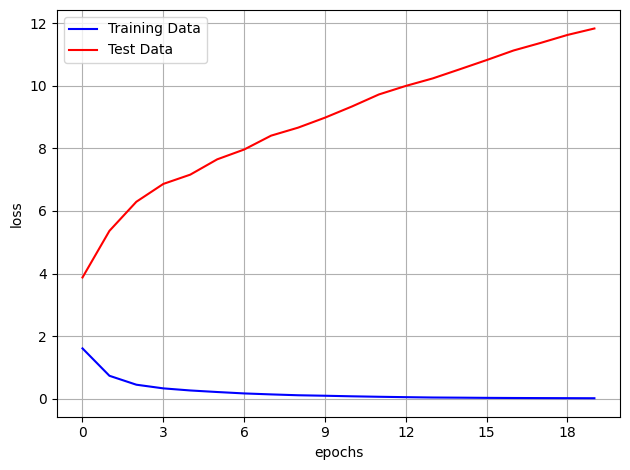

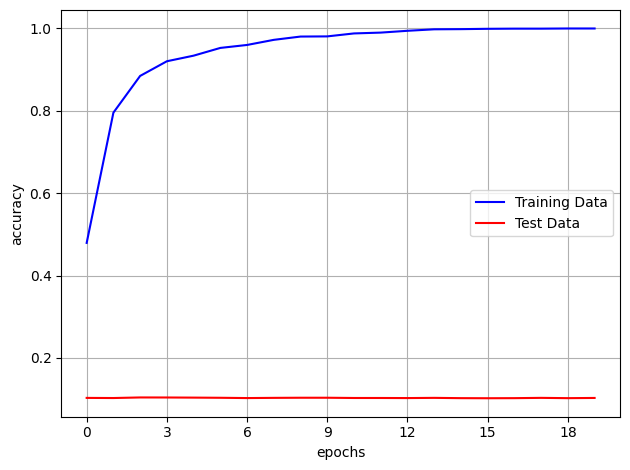

In [ ]:
# plotten
epochs = np.arange(no_epochs)
plt.plot(epochs, train_losses, label = 'Training Data', color ='blue')
plt.plot(epochs, test_losses, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(epochs, train_accuracies, label = 'Training Data', color ='blue')
plt.plot(epochs, test_accuracies, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical

train_loss_list, test_loss_list, train_acc_list, test_acc_list   = [], [], [], []

variance_error, bias_error = [], []
train_length = 100
test_length = 1000
train_data, train_verification_data, test_data, test_verification_data = readData(train_length, test_length)

for i in range(10,200,10):
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_errors = []
    val_errors = []
    
    for train_index, val_index in kf.split(train_data):
        X_train_fold, X_val_fold = train_data[train_index], train_data[val_index]
        y_train_fold, y_val_fold = train_verification_data[train_index], train_verification_data[val_index]
        
        model = Sequential()
        model.add(Dense(i, activation='relu',name = "first_layer"))
        
        model.add(Dense(10, activation = 'softmax', name = "output_layer"))

        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        #model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=128, verbose=0)
        
        y_pred_train = model.predict(X_train_fold)
        y_pred_val = model.predict(X_val_fold)
        
        train_error = mean_squared_error(y_train_fold, np.argmax(y_pred_train, axis=1))
        val_error = mean_squared_error(y_val_fold, np.argmax(y_pred_val, axis=1))
        
        train_errors.append(train_error)
        val_errors.append(val_error)
    
    # Bias-Fehler
    bias_error.append(np.mean(train_errors))
    # Varianz-Fehler
    variance_error.append(np.var(val_errors))
    

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/stepWARNING:tensorflow:6 out of the last 39 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7ff5aad67f40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━

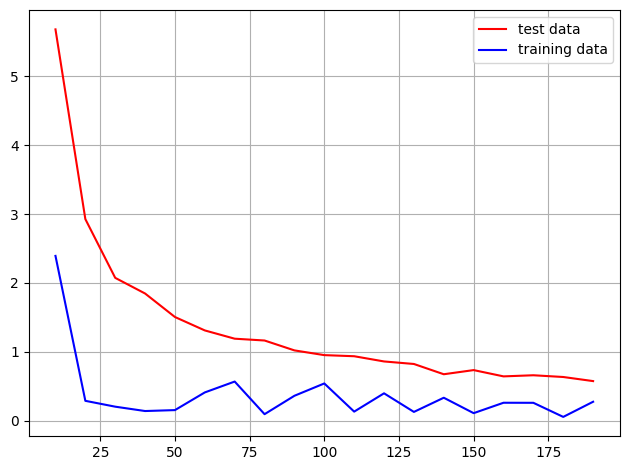

In [ ]:
#plt.plot(np.arange(10,200,10),test_loss_list, color = 'red', label = 'test data')
#plt.plot(np.arange(10,200,10),train_loss_list, color = 'blue', label = 'training data')
plt.plot(np.arange(10,200,10),bias_error, color = 'red', label = 'test data')
plt.plot(np.arange(10,200,10),variance_error, color = 'blue', label = 'training data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()